In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 29.4 MB/s eta 0:00:00


In [ ]:
import gensim.downloader
glove_vectors = gensim.downloader.load('glove-twitter-200')

[==================================================] 100.0% 758.5/758.5MB downloaded


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("haoboxu/amazon-reviews-for-sentiment-analysis")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'amazon-reviews-for-sentiment-analysis' dataset.
Path to dataset files: /kaggle/input/amazon-reviews-for-sentiment-analysis


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn import svm
from gensim.models import Word2Vec
from gensim.parsing.preprocessing import preprocess_documents

In [ ]:
df = pd.read_csv(path+'/software/software/13_17.csv',index_col=0)
df = df.dropna()

In [ ]:
text = df[['reviewText']].values
y = df['overall'].values

In [ ]:
text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=0.2, random_state=25)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=45)

text_train, y_train = rus.fit_resample(text_train, y_train)

In [ ]:
X_train = np.zeros((text_train.shape[0],200))
i=0
for tokens in preprocess_documents(text_train.reshape((-1))):
    if len(tokens)>0:
        vectors = [glove_vectors[token] for token in tokens if token in glove_vectors]
        if len(vectors)>0:
            X_train[i] = np.sum(vectors, axis=0)
    i+=1

In [ ]:
X_test = np.zeros((text_test.shape[0],200))
i=0
for tokens in preprocess_documents(text_test.reshape((-1))):
    if len(tokens)>0:
        vectors = [glove_vectors[token] for token in tokens if token in glove_vectors]
        if len(vectors)>0:
            X_test[i] = np.sum(vectors, axis=0)
    i+=1

In [ ]:
rbf_clf = svm.SVC(kernel='rbf', max_iter=10000,C=10000)

rbf_clf.fit(X_train, y_train)

print(rbf_clf.score(X_train, y_train))
print(rbf_clf.score(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.38366583287576517
0.35820659687932055


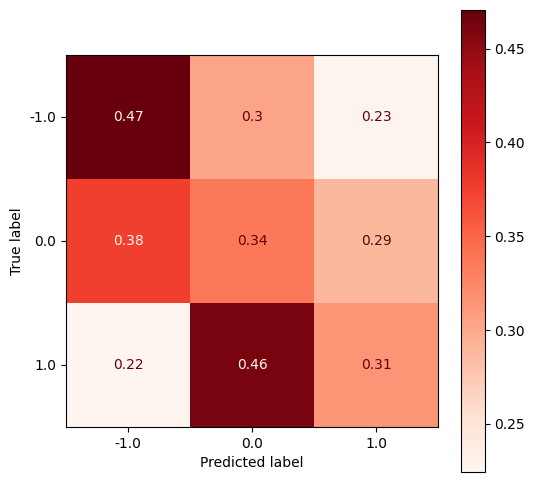

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
disp = ConfusionMatrixDisplay.from_estimator(
        rbf_clf,
        X_test,
        y_test,
        cmap="Reds",
        normalize='true',
        ax=ax
    )